### How Elon Tweets impacts on crypto

In [1]:
################################################Libraries################################################
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="dark", color_codes=True)
from datetime import datetime
import tweepy
import datetime as dt
from dateutil.relativedelta import relativedelta
import warnings
import sys
warnings.filterwarnings("ignore")

from download import data_crypto
from download import data_twitter

def tweet_crypto(screen_name='elonmusk', converter = 'USDT', time = '1MINUTE', days_back = 180):
    ################################################Binance################################################
    #Crypto name to see Elon Tweet impact
    con = data_crypto.data_crypto()
    crypto = input('Crypto: ')
    params_crypto = {"crypto": crypto,
          "days_back": days_back,
          "time": time}
    c_data = con.crypto_download(params_crypto)
    ################################################Twitter################################################
    #Word to search in Elon Tweets
    crypto_tweet = input('Palabras a buscar en los tweets de Elon: ').split(', ')
    
    con = data_twitter.data_twitter()
    params_tweet = {"screen_name": screen_name,
             "crypto_tweet": crypto_tweet}
    tweets = con.twitter_download(params_tweet)
    df_1 = pd.DataFrame()
    for t in tweets:
        df = pd.DataFrame.from_dict(t._json, orient='index').transpose()
        df_1 = pd.concat([df_1,df])
        #Filtrado por palabra
        for c in params_tweet['crypto_tweet']:
            if c.upper() in df['full_text'][0].upper():
                df_1 = pd.concat([df_1,df])
    df_1['created_at'] = pd.to_datetime(df_1['created_at']).dt.strftime('%Y-%m-%d %H:%M:%S')
    df_1['created_at'] = pd.to_datetime(df_1['created_at'])
    ################################################Chart################################################
    #Grafico el precio
    fig, axs = plt.subplots(1, 1, figsize=(15,7))
    #plt.style.use('seaborn-whitegrid')
    #fig.tight_layout(pad=7.5)
    axs.set_title(f'How Elon Tweets of {crypto_tweet[0]} impacts on {crypto} Price')
    axs.set_xlabel('Date')
    axs.set_ylabel(f'{crypto} Price')
    axs.plot(c_data.iloc[:,0], c_data.iloc[:,3], label = f'{crypto} {c_data.columns[3]} Price') #Close Price
    if time.upper() in ('DAY', 'WEEK', 'MONTH', 'YEAR'):
        axs.plot(c_data.iloc[:,0], c_data.iloc[:,1], label = f'{crypto} {c_data.columns[1]} Price', color='green') #High Price
        axs.plot(c_data.iloc[:,0], c_data.iloc[:,2], label = f'{crypto} {c_data.columns[2]} Price', color='red') #Low Price
    ax_1 = axs.twinx()
    ax_1.plot(c_data.iloc[:,0], c_data.iloc[:,5], color='red', alpha=0.5) #Volumen USD
    ax_1.set_ylabel(f'{crypto} {c_data.columns[5]}')
    a = 0
    for i in df_1['created_at']:
        axs.axvline(i, color='black', 
                       label = str(df_1[df_1['created_at'] == i]['full_text'][0]) + '\n (Tweet Date: ' + str(i) + ')', 
                       alpha=0.20 + a)
        a += 0.05
    #axs.legend(loc='lower center', bbox_to_anchor=(0, -0.3), shadow=True)
    #ax_1.legend(loc='lower center', bbox_to_anchor=(0, -1), shadow=True)

    return(plt.show())

Crypto: BTC
Palabras a buscar en los tweets de Elon: DOGE


Unexpected parameter: lang


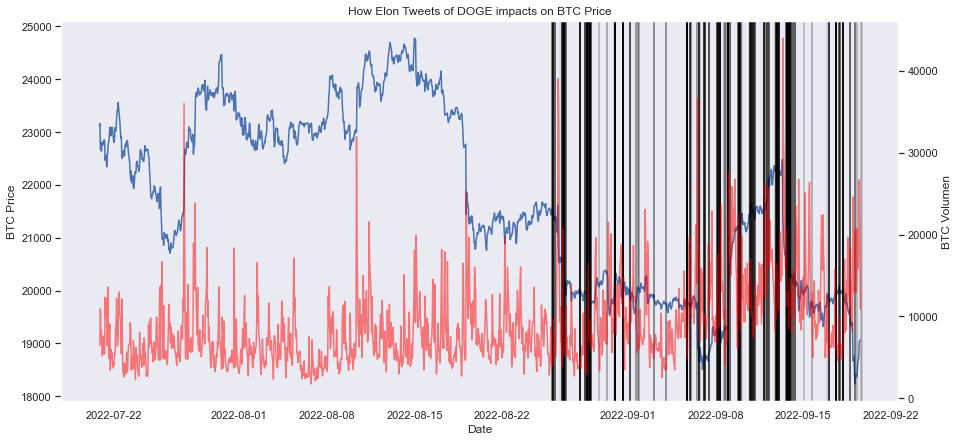

In [2]:
tweet_crypto(time='1HOUR', days_back=60)